<a href="https://colab.research.google.com/github/Syed-Bilal-Hussaini/Task-13/blob/main/Task_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
X = digits.data
y= digits.target

print(f"Original shape: {X.shape}")

Original shape: (1797, 64)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

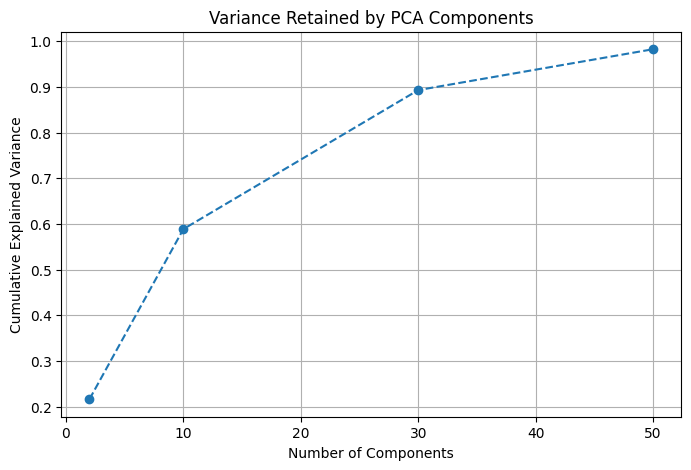

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

components = [2, 10, 30, 50]
explained_variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plotting the Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(components, explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Retained by PCA Components')
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 1. Model with Original Data (64 features)
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, model_full.predict(X_test))

# 2. Model with Reduced Data (30 components)
pca_30 = PCA(n_components=30)
X_train_pca = pca_30.fit_transform(X_train)
X_test_pca = pca_30.transform(X_test)

model_reduced = LogisticRegression(max_iter=1000)
model_reduced.fit(X_train_pca, y_train)
acc_reduced = accuracy_score(y_test, model_reduced.predict(X_test_pca))

print(f"Accuracy (Original 64 features): {acc_full:.4f}")
print(f"Accuracy (Reduced 30 features):  {acc_reduced:.4f}")

Accuracy (Original 64 features): 0.9704
Accuracy (Reduced 30 features):  0.9630


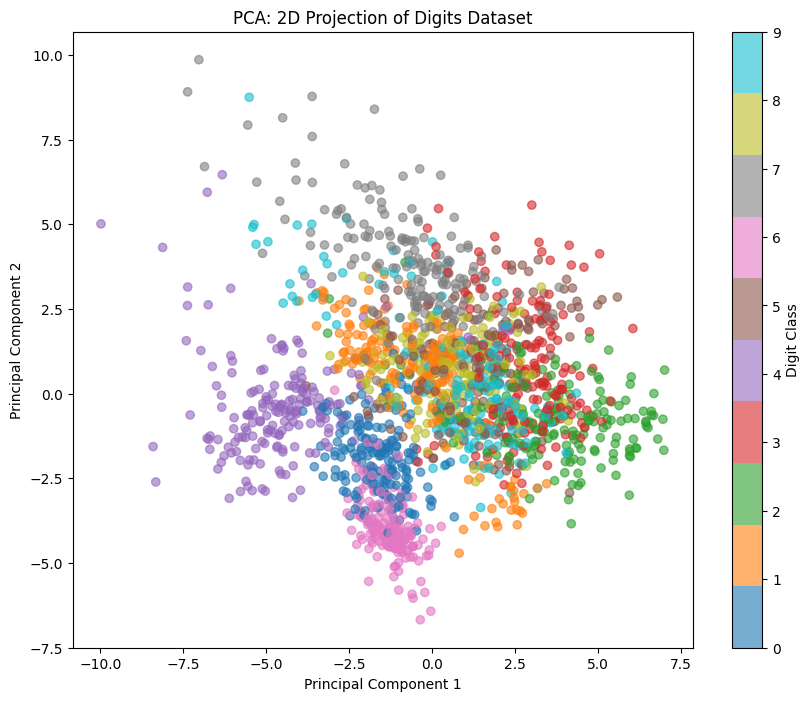

In [11]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA: 2D Projection of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
# Let's assume we are using the 30 components from the previous step
X_pca_30 = pca_30.transform(X_scaled)

# Create column names: [PC1, PC2, ..., PC30]
column_names = [f'PC{i+1}' for i in range(X_pca_30.shape[1])]

# Convert to DataFrame
df_reduced = pd.DataFrame(data=X_pca_30, columns=column_names)

# Add the target labels (the actual digit) back to the dataframe
df_reduced['target'] = y

# Preview the first few rows
print(df_reduced.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.899573 -0.663497 -4.162038 -2.016708 -0.269598  0.185257 -1.168115   
1 -0.609924  0.469565  4.076559  1.563814 -1.273154 -0.679618  1.381535   
2 -1.320940 -0.633391  2.995039  1.783547 -1.950520  1.072283 -0.839100   
3  2.907607 -0.630960 -0.836628  2.336292 -0.248651  0.645274  1.027572   
4 -4.508417 -1.309697  0.971059  1.211752 -1.366666  0.631815  0.978736   

        PC8       PC9      PC10  ...      PC22      PC23      PC24      PC25  \
0  0.690089  1.001436  1.175866  ...  0.831912 -0.415874  0.635544 -0.783530   
1 -0.479810  0.384615  0.495574  ...  0.511818  0.402162 -0.195004  1.062649   
2  1.313536  0.835850  0.940265  ... -0.557287  1.281303 -0.712916 -0.578589   
3 -0.917528 -1.436666  0.516609  ...  0.356889 -0.140909  1.046664 -0.036103   
4 -1.607046 -0.647740  0.309727  ...  0.435392 -0.536056  1.175031  0.683601   

       PC26      PC27      PC28      PC29      PC30  target  
0  0.6

In [13]:
# Save as CSV
df_reduced.to_csv('reduced_digits_data.csv', index=False)
print("File 'reduced_digits_data.csv' has been created.")

File 'reduced_digits_data.csv' has been created.
